In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

## Кирилл Захаров

#### 1) Ввод и проверка данных

In [4]:
df = pd.read_excel("European.xlsx")
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W_Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


In [5]:
# Пропущенные значения?

print(df.shape)
df.info()               

(26, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  26 non-null     object 
 1   Agr      26 non-null     float64
 2   Min      26 non-null     float64
 3   Man      26 non-null     float64
 4   PS       26 non-null     float64
 5   Con      26 non-null     float64
 6   SI       26 non-null     float64
 7   Fin      26 non-null     float64
 8   SPS      26 non-null     float64
 9   TC       26 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.2+ KB


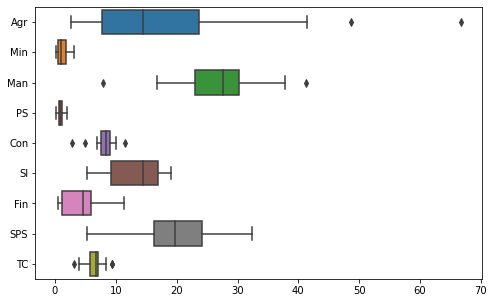

In [6]:
 # Выбросы?
    
fig, ax = plt.subplots(1, 1, figsize=(8, 5))     
sns.boxplot(data=df, ax=ax, orient="h")           
plt.show()                       

По данным видно, что есть страны, где процент занятых в сельском хозяйстве очень велик, что является выбросом, относительно стран с меньшим процентом

#### 2) Проверка применимости МГК  (РСА)

In [7]:
# Наличие корреляции
# Коррелограмма

dfCor=df.corr()

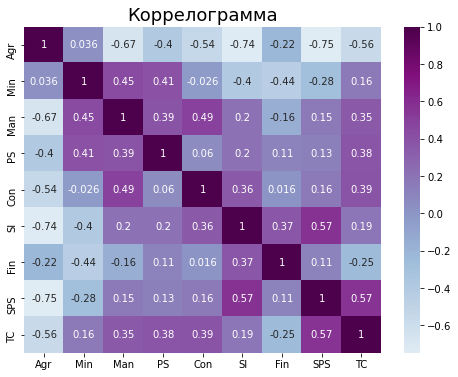

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfCor,xticklabels=dfCor.columns, \
            yticklabels=dfCor.columns, \
            center=0,annot=True, cmap='BuPu')
plt.title('Коррелограмма', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Есть связь между процентом занятых в социальных службах и в транспорте

### Метод Главных Компонент

#### 3) Стандартизация:  данные центрируются (среднее=0) и нормируются (дисперсия=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()              # создать ОБЪЕКТ класса
df_sc = sc.fit_transform(df.iloc[:,1:])     # применить метод

In [13]:
type(df_sc)

numpy.ndarray

In [14]:
sc.mean_

array([19.13076923,  1.25384615, 27.00769231,  0.90769231,  8.16538462,
       12.95769231,  4.        , 20.02307692,  6.54615385])

In [15]:
sc.var_

array([2.32399822e+02, 9.04792899e-01, 4.72199408e+01, 1.36094675e-01,
       2.60380178e+00, 2.01278254e+01, 7.57384615e+00, 4.48486982e+01,
       1.86171598e+00])

In [16]:
df1 = pd.DataFrame(df_sc)              # ndarray в DataFrame
df1.columns = df1.columns+1
df1.index = df1.index + 1
df1.head()

,1,2,3,4,5,6,7,8,9
1,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
2,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
3,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
4,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
5,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


In [17]:
df1.shape

(26, 9)

#### 4) Найдем корреляционную матрицу

In [18]:
dcorr=df1.corr()   #  применяется к DataFrame
dcorr

,1,2,3,4,5,6,7,8,9
1,1.000000,0.035799,-0.671098,-0.400051,-0.538325,-0.736981,-0.219836,-0.746790,-0.564920
2,0.035799,1.000000,0.445196,0.405455,-0.025598,-0.396565,-0.442683,-0.281012,0.156629
3,-0.671098,0.445196,1.000000,0.385346,0.494479,0.203826,-0.155829,0.154171,0.350692
4,-0.400051,0.405455,0.385346,1.000000,0.059889,0.201907,0.109862,0.132411,0.375231
5,-0.538325,-0.025598,0.494479,0.059889,1.000000,0.356022,0.016283,0.158243,0.387662
6,-0.736981,-0.396565,0.203826,0.201907,0.356022,1.000000,0.365555,0.572173,0.187554
7,-0.219836,-0.442683,-0.155829,0.109862,0.016283,0.365555,1.000000,0.107640,-0.245926
8,-0.746790,-0.281012,0.154171,0.132411,0.158243,0.572173,0.107640,1.000000,0.567867
9,-0.564920,0.156629,0.350692,0.375231,0.387662,0.187554,-0.245926,0.567867,1.000000


In [19]:
dcorr.shape

(9, 9)

#### 5) Найдем собственные числа и собственые векторы

In [20]:
eigenvalues, eigenvectors = np.linalg.eig(dcorr)

In [21]:
eigenvalues

array([3.48715127e+00, 2.13017314e+00, 1.09895761e+00, 9.94482978e-01,
       5.43217725e-01, 4.56251025e-05, 3.83427666e-01, 2.25754055e-01,
       1.36789926e-01])

In [23]:
pd.DataFrame(eigenvectors,columns=dcorr.columns,index=df.iloc[:,1:].columns)

,1,2,3,4,5,6,7,8,9
Agr,0.523791,0.053594,0.048674,0.028793,0.212703,0.806418,-0.153307,-0.021321,0.007922
Min,0.001323,0.617807,-0.201100,0.064085,-0.163743,0.048563,0.100590,0.725719,0.088363
Man,-0.347495,0.355054,-0.150463,-0.346088,-0.384958,0.365957,0.288152,-0.479363,0.125818
PS,-0.255716,0.261096,-0.561083,0.393309,0.295172,0.019385,-0.357264,-0.255647,-0.341228
Con,-0.325179,0.051288,0.153321,-0.668324,0.471593,0.082572,-0.130354,0.220695,-0.355734
SI,-0.378920,-0.350172,-0.115096,-0.050157,-0.283568,0.238299,-0.614829,0.229435,0.387537
Fin,-0.074374,-0.453698,-0.587361,-0.051567,0.279568,0.145171,0.525558,0.187455,0.174329
SPS,-0.387409,-0.221521,0.311904,0.412230,-0.220351,0.350942,0.262910,0.191302,-0.506154
TC,-0.366823,0.202592,0.375106,0.314372,0.512936,0.072055,0.123976,-0.068193,0.544562


## Отбор факторов

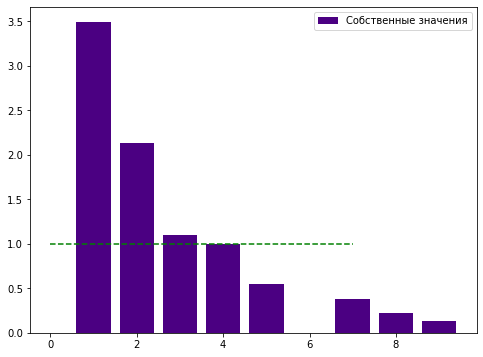

In [24]:
# (1) Критерий Кайзера

fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.bar(range(1, len(eigenvalues)+1), eigenvalues, label = 'Собственные значения', color = 'indigo')
ax.plot(np.full(8, 1), '--',color='green')
ax.legend()
plt.show()

In [25]:
# (2)  Объясненная сумма дисперсии

eigenvalues / np.sum(eigenvalues)*100
np.cumsum(eigenvalues)/ np.sum(eigenvalues)*100

array([ 38.74612525,  62.41471571,  74.62535583,  85.6751667 ,
        91.7109192 ,  91.71142615,  95.97173354,  98.48011194,
       100.        ])

#### PCA Sklearn

In [26]:
from sklearn.decomposition import PCA


In [27]:
pca = PCA(n_components=2)
score_new = pca.fit_transform(df_sc) # матрица счетов, данные в новой системе координат

In [28]:
pd.DataFrame(score_new)

,0,1
0,-1.710498,-1.221791
1,-0.952902,-2.127785
2,-0.754630,-1.121208
3,-0.852553,-0.011377
4,0.103502,-0.413987
5,-0.375407,-0.769547
6,-1.059442,0.755827
7,-1.688217,-2.004845
8,-1.630449,-0.373130
9,-1.176448,0.143101


In [29]:
pca.components_ #  Матрица факторных нагрузок

array([[ 0.52379099,  0.00132346, -0.34749513, -0.25571618, -0.32517932,
        -0.37891966, -0.07437358, -0.38740881, -0.36682271],
       [ 0.05359389,  0.61780714,  0.3550536 ,  0.26109606,  0.05128845,
        -0.35017206, -0.45369785, -0.2215212 ,  0.20259185]])

In [31]:
#  Матрица факторных нагрузок, для наглядности в DataFrame
P=pd.DataFrame((pca.components_).T,
               index=df.iloc[:,1:].columns,columns=[i for i in range(1,pca.components_.shape[0]+1)])
P

,1,2
Agr,0.523791,0.053594
Min,0.001323,0.617807
Man,-0.347495,0.355054
PS,-0.255716,0.261096
Con,-0.325179,0.051288
SI,-0.378920,-0.350172
Fin,-0.074374,-0.453698
SPS,-0.387409,-0.221521
TC,-0.366823,0.202592


In [33]:
# Сравним с собственными векторами
pd.DataFrame(eigenvectors,columns=dcorr.columns,index=df.iloc[:,1:].columns)

,1,2,3,4,5,6,7,8,9
Agr,0.523791,0.053594,0.048674,0.028793,0.212703,0.806418,-0.153307,-0.021321,0.007922
Min,0.001323,0.617807,-0.201100,0.064085,-0.163743,0.048563,0.100590,0.725719,0.088363
Man,-0.347495,0.355054,-0.150463,-0.346088,-0.384958,0.365957,0.288152,-0.479363,0.125818
PS,-0.255716,0.261096,-0.561083,0.393309,0.295172,0.019385,-0.357264,-0.255647,-0.341228
Con,-0.325179,0.051288,0.153321,-0.668324,0.471593,0.082572,-0.130354,0.220695,-0.355734
SI,-0.378920,-0.350172,-0.115096,-0.050157,-0.283568,0.238299,-0.614829,0.229435,0.387537
Fin,-0.074374,-0.453698,-0.587361,-0.051567,0.279568,0.145171,0.525558,0.187455,0.174329
SPS,-0.387409,-0.221521,0.311904,0.412230,-0.220351,0.350942,0.262910,0.191302,-0.506154
TC,-0.366823,0.202592,0.375106,0.314372,0.512936,0.072055,0.123976,-0.068193,0.544562


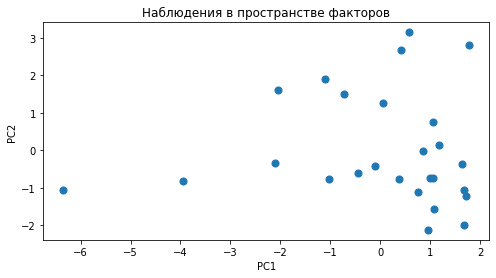

In [34]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))
ax.scatter(-score_new[:, 0], score_new[:, 1],s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Наблюдения в пространстве факторов')
plt.show()

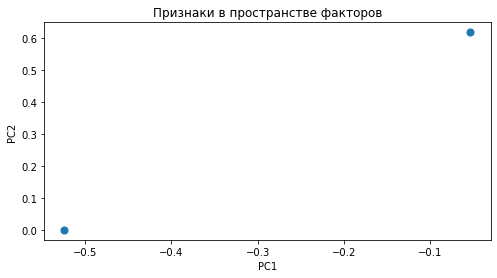

In [35]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))
ax.scatter(-pca.components_[:, 0], pca.components_[:, 1],s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Признаки в пространстве факторов')
plt.show()